# Introduction to Caffe2

* [Github](https://github.com/caffe2/tutorials)

In [2]:
from caffe2.python import workspace
import numpy as np
print ("Creating random data")
data = np.random.rand(3, 2)
print(data)
print ("Adding data to workspace ...")
workspace.FeedBlob("mydata", data)
print ("Retrieving data from workspace")
mydata = workspace.FetchBlob("mydata")
print(mydata) 

Creating random data
[[ 0.67162822  0.11647778]
 [ 0.65790215  0.32997077]
 [ 0.99646904  0.27795456]]
Adding data to workspace ...
Retrieving data from workspace
[[ 0.67162822  0.11647778]
 [ 0.65790215  0.32997077]
 [ 0.99646904  0.27795456]]


## Caffe2 Basic Concepts - Operators & Nets

### Workspaces

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

# We'll also import a few standard python libraries
from matplotlib import pyplot
import numpy as np
import time

# These are the droids you are looking for.
from caffe2.python import core, workspace
from caffe2.proto import caffe2_pb2

# Let's show all plots inline.
%matplotlib inline

In [4]:
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
print("Workspace has blob 'X'? {}".format(workspace.HasBlob("X")))

Current blobs in the workspace: [u'mydata']
Workspace has blob 'X'? False


In [5]:
X = np.random.randn(2, 3).astype(np.float32)
print("Generated X from numpy:\n{}".format(X))
workspace.FeedBlob("X", X)

Generated X from numpy:
[[-1.07317054 -1.86158121  0.456994  ]
 [-0.48893982 -1.22053003 -1.31176674]]


True

In [6]:
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
print("Workspace has blob 'X'? {}".format(workspace.HasBlob("X")))
print("Fetched X:\n{}".format(workspace.FetchBlob("X")))

Current blobs in the workspace: [u'X', u'mydata']
Workspace has blob 'X'? True
Fetched X:
[[-1.07317054 -1.86158121  0.456994  ]
 [-0.48893982 -1.22053003 -1.31176674]]


In [7]:
np.testing.assert_array_equal(X, workspace.FetchBlob("X"))

In [8]:
try:
    workspace.FetchBlob("invincible_pink_unicorn")
except RuntimeError as err:
    print(err)

[enforce fail at pybind_state.cc:150] ws->HasBlob(name). Can't find blob: invincible_pink_unicorn 


In [9]:
print("Current workspace: {}".format(workspace.CurrentWorkspace()))
print("Current blobs in the workspace: {}".format(workspace.Blobs()))

# Switch the workspace. The second argument "True" means creating 
# the workspace if it is missing.
workspace.SwitchWorkspace("gutentag", True)

# Let's print the current workspace. Note that there is nothing in the
# workspace yet.
print("Current workspace: {}".format(workspace.CurrentWorkspace()))
print("Current blobs in the workspace: {}".format(workspace.Blobs()))

Current workspace: default
Current blobs in the workspace: [u'X', u'mydata']
Current workspace: gutentag
Current blobs in the workspace: []


In [10]:
workspace.SwitchWorkspace("default")
print("Current workspace: {}".format(workspace.CurrentWorkspace()))
print("Current blobs in the workspace: {}".format(workspace.Blobs()))

Current workspace: default
Current blobs in the workspace: [u'X', u'mydata']


In [11]:
workspace.ResetWorkspace()
print("Current blobs in the workspace after reset: {}".format(workspace.Blobs()))

Current blobs in the workspace after reset: []


### Operators

In [12]:
# Create an operator.
op = core.CreateOperator(
    "Relu", # The type of operator that we want to run
    ["X"], # A list of input blobs by their names
    ["Y"], # A list of output blobs by their names
)
# and we are done!

In [13]:
print("Type of the created op is: {}".format(type(op)))
print("Content:\n")
print(str(op))

Type of the created op is: <class 'caffe2.proto.caffe2_pb2.OperatorDef'>
Content:

input: "X"
output: "Y"
name: ""
type: "Relu"



In [14]:
workspace.FeedBlob("X", np.random.randn(2, 3).astype(np.float32))
workspace.RunOperatorOnce(op)

True

In [15]:
print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
print("X:\n{}\n".format(workspace.FetchBlob("X")))
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))
print("Expected:\n{}\n".format(np.maximum(workspace.FetchBlob("X"), 0)))

Current blobs in the workspace: [u'X', u'Y']

X:
[[ 1.04313588  0.872702    1.54008341]
 [ 0.89476347 -1.74066854 -0.67585772]]

Y:
[[ 1.04313588  0.872702    1.54008341]
 [ 0.89476347  0.          0.        ]]

Expected:
[[ 1.04313588  0.872702    1.54008341]
 [ 0.89476347  0.          0.        ]]



In [16]:
op = core.CreateOperator(
    "GaussianFill",
    [], # GaussianFill does not need any parameters.
    ["Z"],
    shape=[100, 100], # shape argument as a list of ints.
    mean=1.0,  # mean as a single float
    std=1.0, # std as a single float
)
print("Content of op:\n")
print(str(op))

Content of op:

output: "Z"
name: ""
type: "GaussianFill"
arg {
  name: "std"
  f: 1.0
}
arg {
  name: "shape"
  ints: 100
  ints: 100
}
arg {
  name: "mean"
  f: 1.0
}



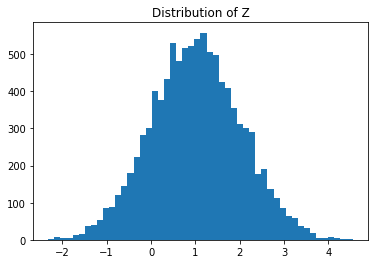

In [17]:
workspace.RunOperatorOnce(op)
temp = workspace.FetchBlob("Z")
pyplot.hist(temp.flatten(), bins=50)
pyplot.title("Distribution of Z")

### Nets

In [18]:
net = core.Net("my_first_net")
print("Current network proto:\n\n{}".format(net.Proto()))

Current network proto:

name: "my_first_net"



In [20]:
X = net.GaussianFill([], ["X"], mean=0.0, std=1.0, shape=[2, 3], run_once=0)
print("New network proto:\n\n{}".format(net.Proto()))

New network proto:

name: "my_first_net"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "mean"
    f: 0.0
  }
}



In [22]:
print("Type of X is: {}".format(type(X)))
print("The blob name is: {}".format(str(X)))

Type of X is: <class 'caffe2.python.core.BlobReference'>
The blob name is: X


In [23]:
W = net.GaussianFill([], ["W"], mean=0.0, std=1.0, shape=[5, 3], run_once=0)
b = net.ConstantFill([], ["b"], shape=[5,], value=1.0, run_once=0)

In [24]:
Y = X.FC([W, b], ["Y"])

In [25]:
print("Current network proto:\n\n{}".format(net.Proto()))

Current network proto:

name: "my_first_net"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "mean"
    f: 0.0
  }
}
op {
  output: "W"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 5
    ints: 3
  }
  arg {
    name: "mean"
    f: 0.0
  }
}
op {
  output: "b"
  name: ""
  type: "ConstantFill"
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 5
  }
  arg {
    name: "value"
    f: 1.0
  }
}
op {
  input: "X"
  input: "W"
  input: "b"
  output: "Y"
  name: ""
  type: "FC"
}



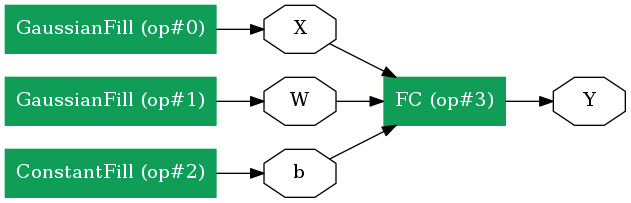

In [26]:
from caffe2.python import net_drawer
from IPython import display
graph = net_drawer.GetPydotGraph(net, rankdir="LR")
display.Image(graph.create_png(), width=800)

In [27]:
workspace.ResetWorkspace()
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
workspace.RunNetOnce(net)
print("Blobs in the workspace after execution: {}".format(workspace.Blobs()))
# Let's dump the contents of the blobs
for name in workspace.Blobs():
    print("{}:\n{}".format(name, workspace.FetchBlob(name)))

Current blobs in the workspace: []
Blobs in the workspace after execution: [u'W', u'X', u'Y', u'b']
W:
[[ 1.41211176  0.83004797 -1.49964428]
 [-0.78219736 -0.31861705 -0.5414893 ]
 [ 2.44183087 -1.97969282  1.1119405 ]
 [ 1.841272   -0.70528024 -0.13377941]
 [ 1.12804198 -0.02724075  0.28887275]]
X:
[[-0.97930652  1.94618177  1.49054921]
 [-2.3318615  -2.06045651  0.55971408]]
Y:
[[-1.00275946  0.33880788 -3.58674097 -2.37517786  0.2728647 ]
 [-4.84249926  3.17739344  0.00742859 -1.91527033 -1.41262317]]
b:
[ 1.  1.  1.  1.  1.]


In [28]:
workspace.ResetWorkspace()
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
workspace.CreateNet(net)
workspace.RunNet(net.Proto().name)
print("Blobs in the workspace after execution: {}".format(workspace.Blobs()))
for name in workspace.Blobs():
    print("{}:\n{}".format(name, workspace.FetchBlob(name)))

Current blobs in the workspace: []
Blobs in the workspace after execution: [u'W', u'X', u'Y', u'b']
W:
[[-2.78649426  0.62858129 -1.70036924]
 [ 0.4536019   0.34711859 -0.08777509]
 [ 0.95787048 -0.85784793 -0.4807438 ]
 [-0.73875237  0.66026819  1.22845817]
 [-0.49416858 -1.59774005 -0.03593279]]
X:
[[ 0.21596187 -1.23071873  1.03361142]
 [ 1.1313653  -1.54335427 -0.64221442]]
Y:
[[-2.13290453  0.58003002  1.76573086  1.29760158  2.82250643]
 [-2.03066468  1.03383291  3.71640539 -1.64375997  2.92987037]]
b:
[ 1.  1.  1.  1.  1.]


In [29]:
# It seems that %timeit magic does not work well with
# C++ extensions so we'll basically do for loops
start = time.time()
for i in range(1000):
    workspace.RunNetOnce(net)
end = time.time()
print('Run time per RunNetOnce: {}'.format((end - start) / 1000))

start = time.time()
for i in range(1000):
    workspace.RunNet(net.Proto().name)
end = time.time()
print('Run time per RunNet: {}'.format((end - start) / 1000))

Run time per RunNetOnce: 6.50930404663e-05
Run time per RunNet: 5.07307052612e-06


## Loading Pre-Trained Models

In [30]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
%matplotlib inline
from caffe2.proto import caffe2_pb2
import numpy as np
import skimage.io
import skimage.transform
from matplotlib import pyplot
import os
from caffe2.python import core, workspace, models
import urllib2
import operator
print("Required modules imported.")

Required modules imported.


In [41]:
!mkdir -p /caffe2/caffe2/python/models/squeezenet

In [44]:
!wget https://github.com/facebookarchive/models/raw/master/squeezenet/init_net.pb -P /caffe2/caffe2/python/models/squeezenet
!wget https://github.com/facebookarchive/models/raw/master/squeezenet/predict_net.pb -P /caffe2/caffe2/python/models/squeezenet
!wget https://github.com/facebookarchive/models/raw/master/squeezenet/value_info.json -P /caffe2/caffe2/python/models/squeezenet

--2023-07-24 06:17:26--  https://github.com/facebookarchive/models/raw/master/squeezenet/init_net.pb
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/facebookarchive/models/master/squeezenet/init_net.pb [following]
--2023-07-24 06:17:27--  https://media.githubusercontent.com/media/facebookarchive/models/master/squeezenet/init_net.pb
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6181001 (5.9M) [application/octet-stream]
Saving to: '/caffe2/caffe2/python/models/squeezenet/init_net.pb'

init_net.pb         100%[===================>]   5.89M  3.61MB/s    in 1.6s    

2023-07-24 

In [45]:
!ls -la /caffe2/caffe2/python/models/squeezenet

total 6052
drwxr-xr-x 1 root root      80 Jul 24 06:17 .
drwxr-xr-x 1 root root      20 Jul 24 06:13 ..
-rw-r--r-- 1 root root 6181001 Jul 24 06:15 init_net.pb
-rw-r--r-- 1 root root    6175 Jul 24 06:15 predict_net.pb
-rw-r--r-- 1 root root      32 Jul 24 06:17 value_info.json


In [32]:
#  Configuration --- Change to your setup and preferences!
# This directory should contain the models downloaded from the model zoo. To run this 
#   tutorial, make sure there is a 'squeezenet' directory at this location that 
#   contains both the 'init_net.pb' and 'predict_net.pb'
CAFFE_MODELS = "/caffe2/caffe2/python/models"

# Some sample images you can try, or use any URL to a regular image.
IMAGE_LOCATION = "flower.jpg"

# What model are we using?
#    Format below is the model's: <folder, INIT_NET, predict_net, mean, input image size>
#    You can switch 'squeezenet' out with 'bvlc_alexnet', 'bvlc_googlenet' or others that you have downloaded
MODEL = 'squeezenet', 'init_net.pb', 'predict_net.pb', 'ilsvrc_2012_mean.npy', 227

# labels - these help decypher the output and source from a list from ImageNet's object labels 
#    to provide an result like "tabby cat" or "lemon" depending on what's in the picture 
#   you submit to the CNN.
labels =  "https://gist.githubusercontent.com/aaronmarkham/cd3a6b6ac071eca6f7b4a6e40e6038aa/raw/9edb4038a37da6b5a44c3b5bc52e448ff09bfe5b/alexnet_codes"
print("Config set!")

Config set!


In [33]:
# set paths and variables from model choice and prep image
CAFFE_MODELS = os.path.expanduser(CAFFE_MODELS)

# mean can be 128 or custom based on the model
# gives better results to remove the colors found in all of the training images
MEAN_FILE = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[3])
if not os.path.exists(MEAN_FILE):
    print("No mean file found!")
    mean = 128
else:
    print ("Mean file found!")
    mean = np.load(MEAN_FILE).mean(1).mean(1)
    mean = mean[:, np.newaxis, np.newaxis]
print("mean was set to: ", mean)

# some models were trained with different image sizes, this helps you calibrate your image
INPUT_IMAGE_SIZE = MODEL[4]

# make sure all of the files are around...
INIT_NET = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[1])
PREDICT_NET = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[2])

# Check to see if the files exist
if not os.path.exists(INIT_NET):
    print("WARNING: " + INIT_NET + " not found!")
else:
    if not os.path.exists(PREDICT_NET):
        print("WARNING: " + PREDICT_NET + " not found!")
    else:
        print("All needed files found!")

No mean file found!
mean was set to:  128


### Data Preprocessing

Original Image Shape:  (534, 800, 3)
Image Shape after rescaling:  (227, 340, 3)
Image Shape after cropping:  (227, 227, 3)
CHW Image Shape:  (3, 227, 227)
NCHW image (ready to be used as input):  (1, 3, 227, 227)


/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


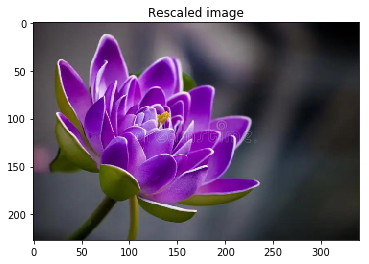

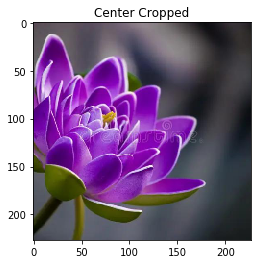

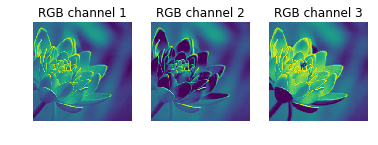

In [37]:
# Function to crop the center cropX x cropY pixels from the input image
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

# Function to rescale the input image to the desired height and/or width. This function will preserve
#   the aspect ratio of the original image while making the image the correct scale so we can retrieve
#   a good center crop. This function is best used with center crop to resize any size input images into
#   specific sized images that our model can use.
def rescale(img, input_height, input_width):
    # Get original aspect ratio
    aspect = img.shape[1]/float(img.shape[0])
    if(aspect>1):
        # landscape orientation - wide image
        res = int(aspect * input_height)
        imgScaled = skimage.transform.resize(img, (input_width, res))
    if(aspect<1):
        # portrait orientation - tall image
        res = int(input_width/aspect)
        imgScaled = skimage.transform.resize(img, (res, input_height))
    if(aspect == 1):
        imgScaled = skimage.transform.resize(img, (input_width, input_height))
    return imgScaled

# Load the image as a 32-bit float
#    Note: skimage.io.imread returns a HWC ordered RGB image of some size
img = skimage.img_as_float(skimage.io.imread(IMAGE_LOCATION)).astype(np.float32)
print("Original Image Shape: " , img.shape)

# Rescale the image to comply with our desired input size. This will not make the image 227x227
#    but it will make either the height or width 227 so we can get the ideal center crop.
img = rescale(img, INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE)
print("Image Shape after rescaling: " , img.shape)
pyplot.figure()
pyplot.imshow(img)
pyplot.title('Rescaled image')

# Crop the center 227x227 pixels of the image so we can feed it to our model
img = crop_center(img, INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE)
print("Image Shape after cropping: " , img.shape)
pyplot.figure()
pyplot.imshow(img)
pyplot.title('Center Cropped')

# switch to CHW (HWC --> CHW)
img = img.swapaxes(1, 2).swapaxes(0, 1)
print("CHW Image Shape: " , img.shape)

pyplot.figure()
for i in range(3):
    # For some reason, pyplot subplot follows Matlab's indexing
    # convention (starting with 1). Well, we'll just follow it...
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(img[i])
    pyplot.axis('off')
    pyplot.title('RGB channel %d' % (i+1))

# switch to BGR (RGB --> BGR)
img = img[(2, 1, 0), :, :]

# remove mean for better results
img = img * 255 - mean

# add batch size axis which completes the formation of the NCHW shaped input that we want
img = img[np.newaxis, :, :, :].astype(np.float32)

print("NCHW image (ready to be used as input): ", img.shape)

### Run Predictions

In [46]:
# Read the contents of the input protobufs into local variables
with open(INIT_NET, "rb") as f:
    init_net = f.read()
with open(PREDICT_NET, "rb") as f:
    predict_net = f.read()

# Initialize the predictor from the input protobufs
p = workspace.Predictor(init_net, predict_net)

# Run the net and return prediction
NCHW_batch = np.zeros((1,3,227,227))
NCHW_batch[0] = img
results = p.run([NCHW_batch.astype(np.float32)])
# Turn it into something we can play with and examine which is in a multi-dimensional array
results = np.asarray(results)
print("results shape: ", results.shape)

# Quick way to get the top-1 prediction result
# Squeeze out the unnecessary axis. This returns a 1-D array of length 1000
preds = np.squeeze(results)
# Get the prediction and the confidence by finding the maximum value and index of maximum value in preds array
curr_pred, curr_conf = max(enumerate(preds), key=operator.itemgetter(1))
print("Prediction: ", curr_pred)
print("Confidence: ", curr_conf)

results shape:  (1, 1, 1000, 1, 1)
Prediction:  723
Confidence:  0.910284


In [47]:
# the rest of this is digging through the results 
results = np.delete(results, 1)
index = 0
highest = 0
arr = np.empty((0,2), dtype=object)
arr[:,0] = int(10)
arr[:,1:] = float(10)
for i, r in enumerate(results):
    # imagenet index begins with 1!
    i=i+1
    arr = np.append(arr, np.array([[i,r]]), axis=0)
    if (r > highest):
        highest = r
        index = i 

# top N results
N = 5
topN = sorted(arr, key=lambda x: x[1], reverse=True)[:N]
print("Raw top {} results: {}".format(N,topN))

# Isolate the indexes of the top-N most likely classes
topN_inds = [int(x[0]) for x in topN]
print("Top {} classes in order: {}".format(N,topN_inds))

# Now we can grab the code list and create a class Look Up Table
response = urllib2.urlopen(labels)
class_LUT = []
for line in response:
    code, result = line.partition(":")[::2]
    code = code.strip()
    result = result.replace("'", "")
    if code.isdigit():
        class_LUT.append(result.split(",")[0][1:])
        
# For each of the top-N results, associate the integer result with an actual class
for n in topN:
    print("Model predicts '{}' with {}% confidence".format(class_LUT[int(n[0])],float("{0:.2f}".format(n[1]*100))))

Raw top 5 results: [array([723.0, 0.9102839827537537], dtype=object), array([968.0, 0.017375782132148743], dtype=object), array([719.0, 0.010471619665622711], dtype=object), array([985.0, 0.009765725582838058], dtype=object), array([767.0, 0.006287392228841782], dtype=object)]
Top 5 classes in order: [723, 968, 719, 985, 767]
Model predicts 'pinwheel' with 91.03% confidence
Model predicts 'cup' with 1.74% confidence
Model predicts 'piggy bank' with 1.05% confidence
Model predicts 'daisy' with 0.98% confidence
Model predicts 'rubber eraser' with 0.63% confidence


In [48]:
# List of input images to be fed
images = ["images/cowboy-hat.jpg",
            "images/cell-tower.jpg",
            "images/Ducreux.jpg",
            "images/pretzel.jpg",
            "images/orangutan.jpg",
            "images/aircraft-carrier.jpg",
            "images/cat.jpg"]

# Allocate space for the batch of formatted images
NCHW_batch = np.zeros((len(images),3,227,227))
print ("Batch Shape: ",NCHW_batch.shape)

# For each of the images in the list, format it and place it in the batch
for i,curr_img in enumerate(images):
    img = skimage.img_as_float(skimage.io.imread(curr_img)).astype(np.float32)
    img = rescale(img, 227, 227)
    img = crop_center(img, 227, 227)
    img = img.swapaxes(1, 2).swapaxes(0, 1)
    img = img[(2, 1, 0), :, :]
    img = img * 255 - mean
    NCHW_batch[i] = img

print("NCHW image (ready to be used as input): ", NCHW_batch.shape)

# Run the net on the batch
results = p.run([NCHW_batch.astype(np.float32)])

# Turn it into something we can play with and examine which is in a multi-dimensional array
results = np.asarray(results)

# Squeeze out the unnecessary axis
preds = np.squeeze(results)
print("Squeezed Predictions Shape, with batch size {}: {}".format(len(images),preds.shape))

# Describe the results
for i,pred in enumerate(preds):
    print("Results for: '{}'".format(images[i]))
    # Get the prediction and the confidence by finding the maximum value 
    #   and index of maximum value in preds array
    curr_pred, curr_conf = max(enumerate(pred), key=operator.itemgetter(1))
    print("\tPrediction: ", curr_pred)
    print("\tClass Name: ", class_LUT[int(curr_pred)])
    print("\tConfidence: ", curr_conf)

Batch Shape:  (7, 3, 227, 227)
NCHW image (ready to be used as input):  (7, 3, 227, 227)
Squeezed Predictions Shape, with batch size 7: (7, 1000)
Results for: 'images/cowboy-hat.jpg'
	Prediction:  515
	Class Name:  cowboy hat
	Confidence:  0.850092
Results for: 'images/cell-tower.jpg'
	Prediction:  645
	Class Name:  maypole
	Confidence:  0.185843
Results for: 'images/Ducreux.jpg'
	Prediction:  568
	Class Name:  fur coat
	Confidence:  0.102531
Results for: 'images/pretzel.jpg'
	Prediction:  932
	Class Name:  pretzel
	Confidence:  0.999622
Results for: 'images/orangutan.jpg'
	Prediction:  365
	Class Name:  orangutan
	Confidence:  0.992006
Results for: 'images/aircraft-carrier.jpg'
	Prediction:  403
	Class Name:  aircraft carrier
	Confidence:  0.999878
Results for: 'images/cat.jpg'
	Prediction:  281
	Class Name:  tabby
	Confidence:  0.513315


## Loading Datasets

In [49]:
# First let's import some necessities
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

%matplotlib inline
import urllib2 # for downloading the dataset from the web.
import numpy as np
from matplotlib import pyplot
from StringIO import StringIO
from caffe2.python import core, utils, workspace
from caffe2.proto import caffe2_pb2

In [51]:
f = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
raw_data = f.read()
print('Raw data looks like this:')
print(raw_data[:100] + '...')

Raw data looks like this:
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,...


In [53]:
# load the features to a feature matrix.
features = np.loadtxt(StringIO(raw_data), dtype=np.float32, delimiter=',', usecols=(0, 1, 2, 3))
# load the labels to a feature matrix
label_converter = lambda s : {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}[s]
labels = np.loadtxt(StringIO(raw_data), dtype=np.int, delimiter=',', usecols=(4,), converters={4: label_converter})

In [54]:
random_index = np.random.permutation(150)
features = features[random_index]
labels = labels[random_index]

train_features = features[:100]
train_labels = labels[:100]
test_features = features[100:]
test_labels = labels[100:]

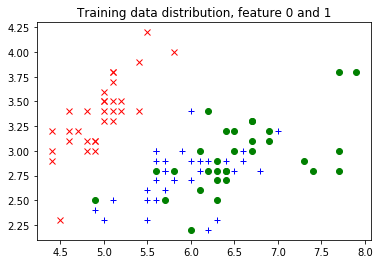

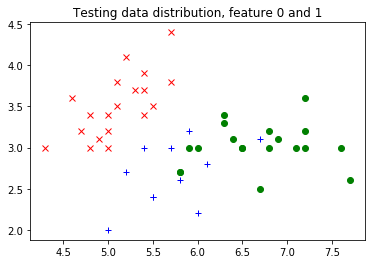

In [55]:
# Let's plot the first two features together with the label.
# Remember, while we are plotting the testing feature distribution
# here too, you might not be supposed to do so in real research,
# because one should not peek into the testing data.
legend = ['rx', 'b+', 'go']
pyplot.title("Training data distribution, feature 0 and 1")
for i in range(3):
    pyplot.plot(train_features[train_labels==i, 0], train_features[train_labels==i, 1], legend[i])
pyplot.figure()
pyplot.title("Testing data distribution, feature 0 and 1")
for i in range(3):
    pyplot.plot(test_features[test_labels==i, 0], test_features[test_labels==i, 1], legend[i])

In [56]:
# First, let's see how one can construct a TensorProtos protocol buffer from numpy arrays.
feature_and_label = caffe2_pb2.TensorProtos()
feature_and_label.protos.extend([
    utils.NumpyArrayToCaffe2Tensor(features[0]),
    utils.NumpyArrayToCaffe2Tensor(labels[0])])
print('This is what the tensor proto looks like for a feature and its label:')
print(str(feature_and_label))
print('This is the compact string that gets written into the db:')
print(feature_and_label.SerializeToString())

This is what the tensor proto looks like for a feature and its label:
protos {
  dims: 4
  data_type: FLOAT
  float_data: 5.19999980927
  float_data: 3.5
  float_data: 1.5
  float_data: 0.20000000298
}
protos {
  data_type: INT32
  int32_data: 0
}

This is the compact string that gets written into the db:

ff�@  `@  �?��L>
" 


In [57]:
# Now, actually write the db.

def write_db(db_type, db_name, features, labels):
    db = core.C.create_db(db_type, db_name, core.C.Mode.write)
    transaction = db.new_transaction()
    for i in range(features.shape[0]):
        feature_and_label = caffe2_pb2.TensorProtos()
        feature_and_label.protos.extend([
            utils.NumpyArrayToCaffe2Tensor(features[i]),
            utils.NumpyArrayToCaffe2Tensor(labels[i])])
        transaction.put(
            'train_%03d'.format(i),
            feature_and_label.SerializeToString())
    # Close the transaction, and then close the db.
    del transaction
    del db

write_db("minidb", "iris_train.minidb", train_features, train_labels)
write_db("minidb", "iris_test.minidb", test_features, test_labels)

In [58]:
net_proto = core.Net("example_reader")
dbreader = net_proto.CreateDB([], "dbreader", db="iris_train.minidb", db_type="minidb")
net_proto.TensorProtosDBInput([dbreader], ["X", "Y"], batch_size=16)

print("The net looks like this:")
print(str(net_proto.Proto()))

The net looks like this:
name: "example_reader"
op {
  output: "dbreader"
  name: ""
  type: "CreateDB"
  arg {
    name: "db_type"
    s: "minidb"
  }
  arg {
    name: "db"
    s: "iris_train.minidb"
  }
}
op {
  input: "dbreader"
  output: "X"
  output: "Y"
  name: ""
  type: "TensorProtosDBInput"
  arg {
    name: "batch_size"
    i: 16
  }
}



In [59]:
workspace.CreateNet(net_proto)

True

In [60]:
# Let's run it to get batches of features.
workspace.RunNet(net_proto.Proto().name)
print("The first batch of feature is:")
print(workspace.FetchBlob("X"))
print("The first batch of label is:")
print(workspace.FetchBlob("Y"))

# Let's run again.
workspace.RunNet(net_proto.Proto().name)
print("The second batch of feature is:")
print(workspace.FetchBlob("X"))
print("The second batch of label is:")
print(workspace.FetchBlob("Y"))

The first batch of feature is:
[[ 5.19999981  3.5         1.5         0.2       ]
 [ 6.5999999   2.9000001   4.5999999   1.29999995]
 [ 5.80000019  2.70000005  4.0999999   1.        ]
 [ 5.          3.29999995  1.39999998  0.2       ]
 [ 6.5         2.79999995  4.5999999   1.5       ]
 [ 4.4000001   3.          1.29999995  0.2       ]
 [ 6.          3.4000001   4.5         1.60000002]
 [ 6.4000001   2.70000005  5.30000019  1.89999998]
 [ 6.69999981  3.0999999   4.4000001   1.39999998]
 [ 5.          3.5999999   1.39999998  0.2       ]
 [ 6.19999981  3.4000001   5.4000001   2.29999995]
 [ 5.0999999   2.5         3.          1.10000002]
 [ 5.5999999   2.5         3.9000001   1.10000002]
 [ 6.30000019  2.29999995  4.4000001   1.29999995]
 [ 5.          3.5         1.29999995  0.30000001]
 [ 5.0999999   3.4000001   1.5         0.2       ]]
The first batch of label is:
[0 1 1 0 1 0 1 2 1 0 2 1 1 1 0 0]
The second batch of feature is:
[[ 6.30000019  2.9000001   5.5999999   1.79999995]
 [ 4.5

## Image Loading and Preprocessing

In [61]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

%matplotlib inline
import skimage
import skimage.io as io
import skimage.transform 
import sys
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.image as mpimg
print("Required modules imported.")

Required modules imported.


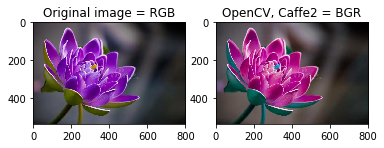

In [62]:
# You can load either local IMAGE_FILE or remote URL
# For Round 1 of this tutorial, try a local image.
IMAGE_LOCATION = 'flower.jpg'

# For Round 2 of this tutorial, try a URL image with a flower: 
# IMAGE_LOCATION = "https://cdn.pixabay.com/photo/2015/02/10/21/28/flower-631765_1280.jpg"
# IMAGE_LOCATION = "images/flower.jpg"

# For Round 3 of this tutorial, try another URL image with lots of people:
# IMAGE_LOCATION = "https://upload.wikimedia.org/wikipedia/commons/1/18/NASA_Astronaut_Group_15.jpg"
# IMAGE_LOCATION = "images/astronauts.jpg"

# For Round 4 of this tutorial, try a URL image with a portrait!
# IMAGE_LOCATION = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Ducreux1.jpg"
# IMAGE_LOCATION = "images/Ducreux.jpg"

img = skimage.img_as_float(skimage.io.imread(IMAGE_LOCATION)).astype(np.float32)

# test color reading
# show the original image
pyplot.figure()
pyplot.subplot(1,2,1)
pyplot.imshow(img)
pyplot.axis('on')
pyplot.title('Original image = RGB')

# show the image in BGR - just doing RGB->BGR temporarily for display
imgBGR = img[:, :, (2, 1, 0)]
#pyplot.figure()
pyplot.subplot(1,2,2)
pyplot.imshow(imgBGR)
pyplot.axis('on')
pyplot.title('OpenCV, Caffe2 = BGR')

Image shape before HWC --> CHW conversion:  (534, 800, 3)
Image shape after HWC --> CHW conversion:  (3, 534, 800)
Here come bad things!


TypeError: Invalid dimensions for image data

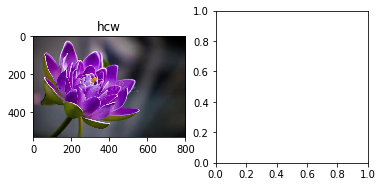

In [75]:
img_hcw = "flower.jpg"
img_hcw = skimage.img_as_float(skimage.io.imread(img_hcw)).astype(np.float32)
print("Image shape before HWC --> CHW conversion: ", img_hcw.shape)
# swapping the axes to go from HWC to CHW
# uncomment the next line and run this block!
img_chw = img_hcw.swapaxes(1, 2).swapaxes(0, 1)
print("Image shape after HWC --> CHW conversion: ", img_chw.shape)
# we know this is going to go wrong, so...
try:
    # Plot original
    pyplot.figure()
    pyplot.subplot(1, 2, 1)
    pyplot.imshow(img_hcw)
    pyplot.axis('on')
    pyplot.title('hcw')
    pyplot.subplot(1, 2, 2)
    pyplot.imshow(img_chw)
    pyplot.axis('on')
    pyplot.title('chw')
except:
    print("Here come bad things!")
    # TypeError: Invalid dimensions for image data
    raise 

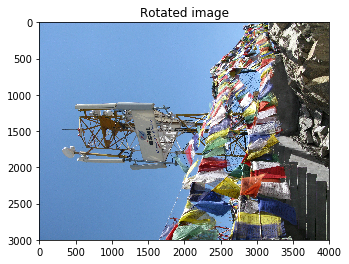

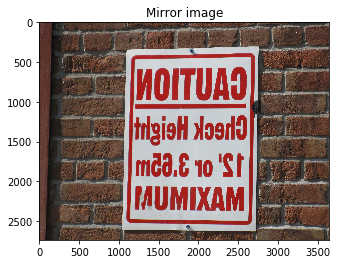

In [63]:
# Image came in sideways - it should be a portait image!
# How you detect this depends on the platform
# Could be a flag from the camera object
# Could be in the EXIF data
# ROTATED_IMAGE = "https://upload.wikimedia.org/wikipedia/commons/8/87/Cell_Phone_Tower_in_Ladakh_India_with_Buddhist_Prayer_Flags.jpg"
ROTATED_IMAGE = "images/cell-tower.jpg"
imgRotated = skimage.img_as_float(skimage.io.imread(ROTATED_IMAGE)).astype(np.float32)
pyplot.figure()
pyplot.imshow(imgRotated)
pyplot.axis('on')
pyplot.title('Rotated image')

# Image came in flipped or mirrored - text is backwards!
# Again detection depends on the platform
# This one is intended to be read by drivers in their rear-view mirror
# MIRROR_IMAGE = "https://upload.wikimedia.org/wikipedia/commons/2/27/Mirror_image_sign_to_be_read_by_drivers_who_are_backing_up_-b.JPG"
MIRROR_IMAGE = "images/mirror-image.jpg"
imgMirror = skimage.img_as_float(skimage.io.imread(MIRROR_IMAGE)).astype(np.float32)
pyplot.figure()
pyplot.imshow(imgMirror)
pyplot.axis('on')
pyplot.title('Mirror image')

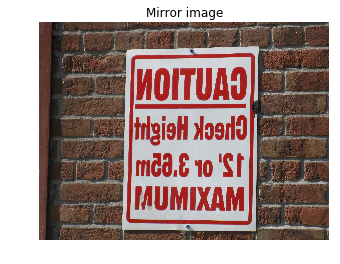

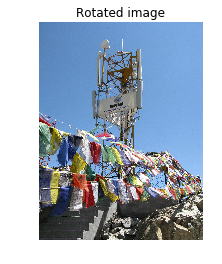

In [65]:
# Run me to flip the image back and forth
imgMirror = np.fliplr(imgMirror)
pyplot.figure()
pyplot.imshow(imgMirror)
pyplot.axis('off')
pyplot.title('Mirror image')

# Run me to rotate the image 90 degrees
imgRotated = np.rot90(imgRotated, 3)
pyplot.figure()
pyplot.imshow(imgRotated)
pyplot.axis('off')
pyplot.title('Rotated image')

Original image's shape is 534x800
Model's input shape is 224x224
New image shape:(256, 256, 3)


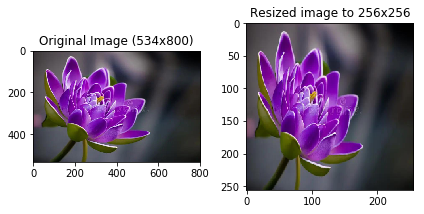

In [66]:
# Model is expecting 224 x 224, so resize/crop needed.
# First, let's resize the image to 256*256
orig_h, orig_w, _ = img.shape
print("Original image's shape is {}x{}".format(orig_h, orig_w))
input_height, input_width = 224, 224
print("Model's input shape is {}x{}".format(input_height, input_width))
img256 = skimage.transform.resize(img, (256, 256))

# Plot original and resized images for comparison
f, axarr = pyplot.subplots(1,2)
axarr[0].imshow(img)
axarr[0].set_title("Original Image (" + str(orig_h) + "x" + str(orig_w) + ")")
axarr[0].axis('on')
axarr[1].imshow(img256)
axarr[1].axis('on')
axarr[1].set_title('Resized image to 256x256')
pyplot.tight_layout()

print("New image shape:" + str(img256.shape))

Original image shape:(534, 800, 3) and remember it should be in H, W, C!
Model's input shape is 224x224
Orginal aspect ratio: 1.49812734082
New image shape:(224, 335, 3) in HWC


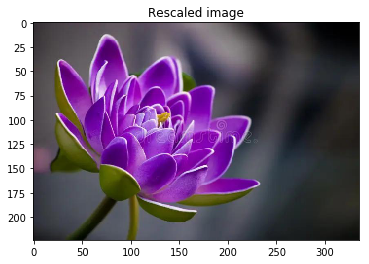

In [67]:
print("Original image shape:" + str(img.shape) + " and remember it should be in H, W, C!")
print("Model's input shape is {}x{}".format(input_height, input_width))
aspect = img.shape[1]/float(img.shape[0])
print("Orginal aspect ratio: " + str(aspect))
if(aspect>1):
    # landscape orientation - wide image
    res = int(aspect * input_height)
    imgScaled = skimage.transform.resize(img, (input_height, res))
if(aspect<1):
    # portrait orientation - tall image
    res = int(input_width/aspect)
    imgScaled = skimage.transform.resize(img, (res, input_width))
if(aspect == 1):
    imgScaled = skimage.transform.resize(img, (input_height, input_width))
pyplot.figure()
pyplot.imshow(imgScaled)
pyplot.axis('on')
pyplot.title('Rescaled image')
print("New image shape:" + str(imgScaled.shape) + " in HWC")

Original image shape:(534, 800, 3) and remember it should be in H, W, C!


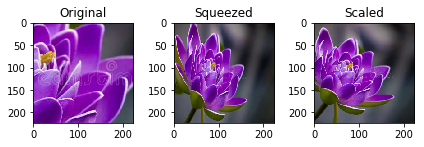

In [68]:
# Compare the images and cropping strategies
# Try a center crop on the original for giggles
print("Original image shape:" + str(img.shape) + " and remember it should be in H, W, C!")
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]
# yes, the function above should match resize and take a tuple...

pyplot.figure()
# Original image
imgCenter = crop_center(img,224,224)
pyplot.subplot(1,3,1)
pyplot.imshow(imgCenter)
pyplot.axis('on')
pyplot.title('Original')

# Now let's see what this does on the distorted image
img256Center = crop_center(img256,224,224)
pyplot.subplot(1,3,2)
pyplot.imshow(img256Center)
pyplot.axis('on')
pyplot.title('Squeezed')

# Scaled image
imgScaledCenter = crop_center(imgScaled,224,224)
pyplot.subplot(1,3,3)
pyplot.imshow(imgScaledCenter)
pyplot.axis('on')
pyplot.title('Scaled')

pyplot.tight_layout()

Original image shape:  (128, 128, 4)
Upscaled image shape:  (224, 224, 4)


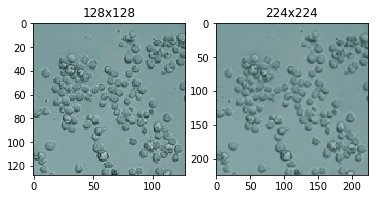

In [69]:
imgTiny = "images/Cellsx128.png"
imgTiny = skimage.img_as_float(skimage.io.imread(imgTiny)).astype(np.float32)
print("Original image shape: ", imgTiny.shape)
imgTiny224 = skimage.transform.resize(imgTiny, (224, 224))
print("Upscaled image shape: ", imgTiny224.shape)
# Plot original
pyplot.figure()
pyplot.subplot(1, 2, 1)
pyplot.imshow(imgTiny)
pyplot.axis('on')
pyplot.title('128x128')
# Plot upscaled
pyplot.subplot(1, 2, 2)
pyplot.imshow(imgTiny224)
pyplot.axis('on')
pyplot.title('224x224')

Image shape before HWC --> CHW conversion:  (224, 224, 3)
Image shape after HWC --> CHW conversion:  (3, 224, 224)
Image shape after BGR conversion:  (3, 224, 224)
Final input shape is: (1, 3, 224, 224)


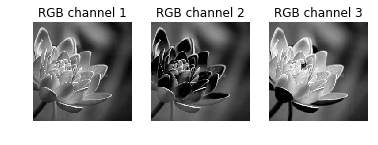

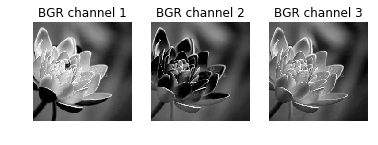

In [76]:
# This next line helps with being able to rerun this section
# if you want to try the outputs of the different crop strategies above
# swap out imgScaled with img (original) or img256 (squeezed)
imgCropped = crop_center(imgScaled,224,224)
print("Image shape before HWC --> CHW conversion: ", imgCropped.shape)
# (1) Since Caffe expects CHW order and the current image is HWC,
#     we will need to change the order.
imgCropped = imgCropped.swapaxes(1, 2).swapaxes(0, 1)
print("Image shape after HWC --> CHW conversion: ", imgCropped.shape)

pyplot.figure()
for i in range(3):
    # For some reason, pyplot subplot follows Matlab's indexing
    # convention (starting with 1). Well, we'll just follow it...
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(imgCropped[i], cmap=pyplot.cm.gray)
    pyplot.axis('off')
    pyplot.title('RGB channel %d' % (i+1))

# (2) Caffe uses a BGR order due to legacy OpenCV issues, so we
#     will change RGB to BGR.
imgCropped = imgCropped[(2, 1, 0), :, :]
print("Image shape after BGR conversion: ", imgCropped.shape)

# for discussion later - not helpful at this point
# (3) (Optional) We will subtract the mean image. Note that skimage loads
#     image in the [0, 1] range so we multiply the pixel values
#     first to get them into [0, 255].
#mean_file = os.path.join(CAFFE_ROOT, 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
#mean = np.load(mean_file).mean(1).mean(1)
#img = img * 255 - mean[:, np.newaxis, np.newaxis]

pyplot.figure()
for i in range(3):
    # For some reason, pyplot subplot follows Matlab's indexing
    # convention (starting with 1). Well, we'll just follow it...
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(imgCropped[i], cmap=pyplot.cm.gray)
    pyplot.axis('off')
    pyplot.title('BGR channel %d' % (i+1))
# (4) Finally, since caffe2 expect the input to have a batch term
#     so we can feed in multiple images, we will simply prepend a
#     batch dimension of size 1. Also, we will make sure image is
#     of type np.float32.
imgCropped = imgCropped[np.newaxis, :, :, :].astype(np.float32)
print('Final input shape is:', imgCropped.shape)